### Import Libraries

In [1]:
from IPython.display import clear_output

In [2]:
!pip install transformers
!pip install pdfplumber
clear_output()

In [162]:
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import torch
import matplotlib.pyplot as plt
import pdfplumber
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
!python -m spacy download en_core_web_sm
import en_core_web_sm
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
clear_output()

In [4]:
plt.style.use('dark_background')

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.facecolor": "black",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "grey",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

### Extract PDF into text

In [5]:
def extract_pdf(directory):
    all_text = ''
    with pdfplumber.open(directory) as pdf:
            for pdf_page in pdf.pages:
                single_page_text = pdf_page.extract_text()
                all_text = all_text + '\n' + single_page_text
        
    return all_text

In [202]:
doc = '/content/drive/MyDrive/EMARKETING TEXTBOOK FOR PROFASSIST.pdf'
text = extract_pdf(doc)

### Text Processing

In [203]:
text = re.sub('\\+n', ' ', text)
text = re.sub('\n'," ",text) # Remove every '\n'
text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
text = re.sub(':', ' ', text)
text = re.sub(';', ' ', text)
text = re.sub(',', ' ', text)
text = re.sub('\\+', ' ', text)
text = re.sub('  +', ' ', text) # Remove extra spaces
text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text) # Remove numbers
text = re.sub('[^a-zA-Z]+', ' ', text) # Remove Numbers

In [204]:
text

' eMarketing The essential guide to marketing in a digital world th Edition Rob Stokes and the Minds of Quirk Fifth Edition eMarketing The essential guide to marketing in a digital world By Rob Stokes and the Minds of Quirk First published by Quirk eMarketing Pty Ltd Copyright Quirk Education Pty Ltd This book is published under the Creative Commons Attribution Non Commercial ShareAlike Unported licence This means that you can share and distribute this work and you can even modify it as long as you do not use it for commercial gain you share all modifications and you credit Quirk Pty Ltd For more information you can visit or eMarketing The essential guide to marketing in a digital world ISBN Fifth Edition Book design and typesetting by Solveig Bosch from SolDesign By Rob Stokes and the Minds of Quirk Cover illustration inspired by Craig Raw and designed by Anka Joubert This book is typeset in DIN and it is printed by Creda Printers Trademarks All terms or names used in this book that a

In [205]:
stopwords = list(STOP_WORDS)
nlp = spacy.load('en_core_web_sm')
doc_text = nlp(text[:100000])

In [206]:
tokens = [token.text for token in doc_text]
print(tokens)

[' ', 'eMarketing', 'The', 'essential', 'guide', 'to', 'marketing', 'in', 'a', 'digital', 'world', 'th', 'Edition', 'Rob', 'Stokes', 'and', 'the', 'Minds', 'of', 'Quirk', 'Fifth', 'Edition', 'eMarketing', 'The', 'essential', 'guide', 'to', 'marketing', 'in', 'a', 'digital', 'world', 'By', 'Rob', 'Stokes', 'and', 'the', 'Minds', 'of', 'Quirk', 'First', 'published', 'by', 'Quirk', 'eMarketing', 'Pty', 'Ltd', 'Copyright', 'Quirk', 'Education', 'Pty', 'Ltd', 'This', 'book', 'is', 'published', 'under', 'the', 'Creative', 'Commons', 'Attribution', 'Non', 'Commercial', 'ShareAlike', 'Unported', 'licence', 'This', 'means', 'that', 'you', 'can', 'share', 'and', 'distribute', 'this', 'work', 'and', 'you', 'can', 'even', 'modify', 'it', 'as', 'long', 'as', 'you', 'do', 'not', 'use', 'it', 'for', 'commercial', 'gain', 'you', 'share', 'all', 'modifications', 'and', 'you', 'credit', 'Quirk', 'Pty', 'Ltd', 'For', 'more', 'information', 'you', 'can', 'visit', 'or', 'eMarketing', 'The', 'essential', 'g

In [207]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [208]:
# Membuat dictionary bag of word
word_frequencies = {}

# Mengisi word_frequencies tanpa stopword dan karakter khusus
for word in doc_text:
    if word.text.lower() not in stopwords:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1
                
print(word_frequencies)

{' ': 1, 'eMarketing': 19, 'essential': 14, 'guide': 27, 'marketing': 208, 'digital': 156, 'world': 27, 'th': 4, 'Edition': 7, 'Rob': 6, 'Stokes': 5, 'Minds': 4, 'Quirk': 25, 'Fifth': 3, 'published': 8, 'Pty': 6, 'Ltd': 6, 'Copyright': 1, 'Education': 8, 'book': 44, 'Creative': 5, 'Commons': 5, 'Attribution': 1, 'Non': 1, 'Commercial': 1, 'ShareAlike': 1, 'Unported': 1, 'licence': 2, 'means': 12, 'share': 12, 'distribute': 2, 'work': 14, 'modify': 1, 'long': 5, 'use': 21, 'commercial': 3, 'gain': 10, 'modifications': 1, 'credit': 2, 'information': 32, 'visit': 3, 'ISBN': 1, 'Book': 2, 'design': 8, 'typesetting': 1, 'Solveig': 1, 'Bosch': 1, 'SolDesign': 1, 'Cover': 1, 'illustration': 1, 'inspired': 1, 'Craig': 1, 'Raw': 1, 'designed': 3, 'Anka': 1, 'Joubert': 1, 'typeset': 1, 'DIN': 1, 'printed': 3, 'Creda': 1, 'Printers': 1, 'Trademarks': 1, 'terms': 33, 'names': 1, 'known': 6, 'trademarks': 1, 'service': 17, 'marks': 1, 'appropriately': 1, 'capitalised': 1, 'attest': 1, 'accuracy': 2

In [209]:
max_frequency = max(word_frequencies.values())
max_frequency

208

In [210]:
for word in word_frequencies.keys():
    word_frequencies[word] = word_frequencies[word]/max_frequency

print(word_frequencies)

{' ': 0.004807692307692308, 'eMarketing': 0.09134615384615384, 'essential': 0.0673076923076923, 'guide': 0.12980769230769232, 'marketing': 1.0, 'digital': 0.75, 'world': 0.12980769230769232, 'th': 0.019230769230769232, 'Edition': 0.03365384615384615, 'Rob': 0.028846153846153848, 'Stokes': 0.02403846153846154, 'Minds': 0.019230769230769232, 'Quirk': 0.1201923076923077, 'Fifth': 0.014423076923076924, 'published': 0.038461538461538464, 'Pty': 0.028846153846153848, 'Ltd': 0.028846153846153848, 'Copyright': 0.004807692307692308, 'Education': 0.038461538461538464, 'book': 0.21153846153846154, 'Creative': 0.02403846153846154, 'Commons': 0.02403846153846154, 'Attribution': 0.004807692307692308, 'Non': 0.004807692307692308, 'Commercial': 0.004807692307692308, 'ShareAlike': 0.004807692307692308, 'Unported': 0.004807692307692308, 'licence': 0.009615384615384616, 'means': 0.057692307692307696, 'share': 0.057692307692307696, 'distribute': 0.009615384615384616, 'work': 0.0673076923076923, 'modify': 

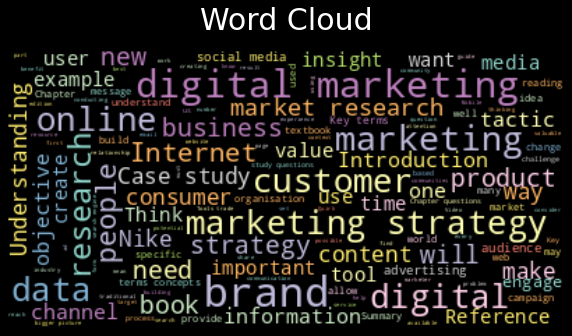

In [239]:
from wordcloud import WordCloud
from PIL import Image

text = str(doc_text).replace("'","")

wordcloud = WordCloud(max_font_size=30, max_words=200, colormap='Set3',
                      background_color="black").generate(text)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud", fontsize=30, pad=20)
plt.axis("off")
plt.show()

In [212]:
sentence_tokens = [sent for sent in doc_text.sents]

In [214]:
sentence_scores = {}
for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.text.lower()]
                
sentence_scores

{ eMarketing The essential guide to marketing in a digital world th Edition Rob Stokes and the Minds of Quirk Fifth Edition eMarketing The essential guide to marketing in a digital world By Rob Stokes and the Minds of Quirk First published by Quirk eMarketing Pty Ltd: 4.423076923076925,
 Copyright Quirk Education Pty Ltd: 0.04326923076923077,
 This book is published under the Creative Commons Attribution Non Commercial ShareAlike Unported licence This means that you can share and distribute this work and you can even modify it as long as you do not use it for commercial gain you share all modifications and you credit Quirk Pty Ltd: 0.7451923076923076,
 For more information you can visit or eMarketing The essential guide to marketing in a digital world ISBN Fifth Edition Book design and typesetting by Solveig Bosch from SolDesign By Rob Stokes and the Minds of Quirk Cover illustration inspired by Craig Raw and designed by Anka Joubert: 2.634615384615386,
 This book is typeset in DIN and

### Summarization

In [215]:
from heapq import nlargest

summarization_percentage = 0.1
select_length = int(len(sentence_tokens) * summarization_percentage)
select_length

17

In [216]:
summary = nlargest(select_length, sentence_scores, key = sentence_scores.get)

In [217]:
summary

[Crafting a digital marketing strategy Tactics and evaluation Video marketing Branding customer retention and value creation Many digital tools and tactics are available once you have defined your digital marketing objectives Each tactic has its strengths for example acquisition Video marketing involves creating Since it is so interactive and engaging video marketing is gaining new customers may best be driven by search advertising while email video content This can either be excellent for capturing and retaining customer attention outright video advertising or can be Done correctly it provides tangible value in the form of is one of the most effective tools for selling more products to existing customers valuable useful content marketing information entertainment or inspiration and boosts a brand s image in the eyes of the public The table below expands on some of the most popular tactics available to digital marketers and their possible outcomes These will be covered in far more deta

In [218]:
final_summary = [word.text for word in summary]
summary = ' '.join(final_summary)

In [236]:
print(f"Word counts before summarization: {len(text)}")
print(f"Word counts after summarization: {len(summary)}")

Word counts before summarization: 100000
Word counts after summarization: 32822


### Model Predicting

In [221]:
def get_answer_using_bert(question, reference_text):
    # Load fine-tuned model for QA
    bert_model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

    # Load Vocab as well
    bert_tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

    # Apply bert_tokenizer on input text
    input_ids = bert_tokenizer.encode(question, reference_text, padding='longest', truncation=True, max_length=50, add_special_tokens=True)
    input_tokens = bert_tokenizer.convert_ids_to_tokens(input_ids)

    # Search index of first [SEP] token
    sep_location = input_ids.index(bert_tokenizer.sep_token_id)
    first_seg_len, second_seg_len = sep_location + 1, len(input_ids) - (sep_location + 1)
    seg_embedding = [0] * first_seg_len + [1] * second_seg_len

    # Run our example on model
    model_scores = bert_model(torch.tensor([input_ids]), token_type_ids=torch.tensor([seg_embedding]))
    ans_start_loc, ans_end_loc = torch.argmax(model_scores[0]), torch.argmax(model_scores[1])
    result = ' '.join(input_tokens[ans_start_loc:ans_end_loc + 1])

    # Return final result
    result = result.replace(' ##', '')
    return result

In [238]:
if __name__=="__main__":
    reference_text = summary
    question = input('Your question? \n \n')
    print('\n')
    print(get_answer_using_bert(question, reference_text))

Your question? 
 
what makes marketing successful?




Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.


customer retention and value creation many digital tools and tactics are available once you have defined your digital marketing objectives each tactic has its strengths
